In [58]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 讀取與顯示數位影像

In [60]:
img_ori=cv2.imread(r"input\lena.bmp",-1)  #讀取影像檔案，第一個參數為檔案名稱，第二個參數為影像的讀取方式
cv2.imshow("example",img_ori)  #建立視窗，視窗名稱為example
cv2.waitKey(0)  #等待使用者的鍵盤輸入，單位為毫秒(ms)，例如1,000 代表等待1秒再關閉視窗，0則表示持續等待使用者輸入任意鍵後再關閉視窗。
cv2.destroyAllWindows()  #關閉所有視窗

## 1. Histogram Equalization
Histogram is the method to enhance image contrast.
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\danie\AppData\Local\Temp\ipykernel_36444\4265917748.py:1: SyntaxWarning: invalid escape sequence '\l'
  img_ori = cv2.imread("input\lena.bmp", cv2.IMREAD_GRAYSCALE) # Read image as gray.


<BarContainer object of 256 artists>

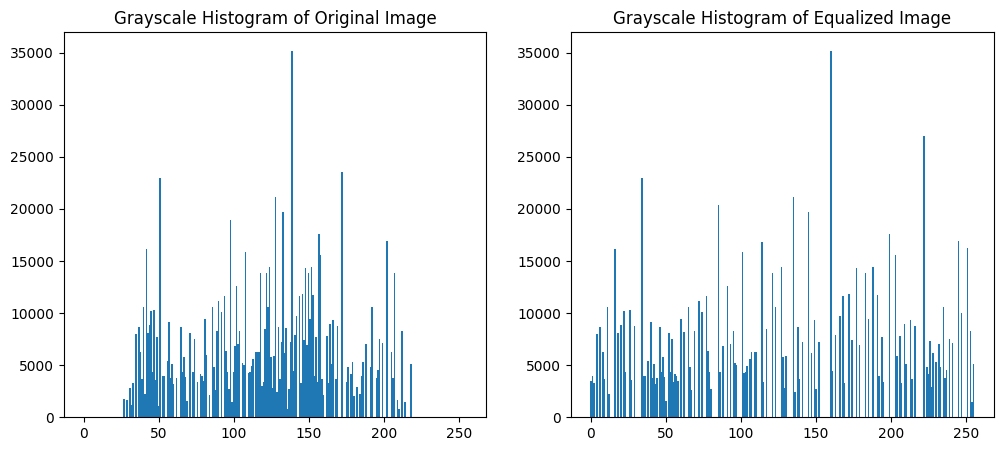

In [61]:
img_ori = cv2.imread("input\lena.bmp", cv2.IMREAD_GRAYSCALE) # Read image as gray.
# code begins 
histogram=cv2.calcHist([img_ori], [0], None, [256], [0,256])   # (檔案, 通道0~2 (灰、藍)(綠)(紅), 遮罩用來計算影像某部分 none是整張算, 直方圖bin數量, 像素值範圍[0,256])
image_equalize=cv2.equalizeHist(img_ori)
hist_equalize = cv2.calcHist([image_equalize], [0], None, [256], [0,256])
# code ends
# save result
cv2.imwrite('output/img_ori.bmp', img_ori)   # cv2.calcHist 回傳的是一個 2D 陣列 (形狀 (256,1))
cv2.imwrite('output/img_equa.bmp', image_equalize)  # 個人認為存絕對路徑較好
# plot histogram of original image
plt.figure(figsize=(12,5))   # 圖的大小,吋,寬12高5
plt.subplot(1,2,1)   # 建立子圖 (1列, 2欄, 第 1 個位置)
plt.title("Grayscale Histogram of Original Image")
plt.bar(range(256), histogram.flatten(), width=1)   # (對應到「像素值」, 把它攤平成一維（長度 256）, 柱子的寬度為 1)
# plot histogram of equalized image  
plt.subplot(1,2,2)   
plt.title("Grayscale Histogram of Equalized Image")
plt.bar(range(256), hist_equalize.flatten(), width=1)

## 2.Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image. Please input the image and use different kernel size to show blur result.

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\danie\AppData\Local\Temp\ipykernel_36444\2916168140.py:1: SyntaxWarning: invalid escape sequence '\l'
  img_noise = cv2.imread("input\lena_noise.png", cv2.IMREAD_GRAYSCALE)


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

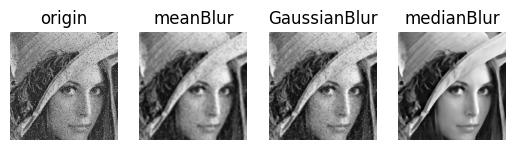

In [62]:
img_noise = cv2.imread("input\lena_noise.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1,4,1)
plt.imshow(img_noise, cmap='gray')  # cmap把像素值顯示成 黑白灰階
plt.title("origin")
plt.axis("off")
# Blur the image by three methods.
# code begins
image_meanBlur = cv2.blur(img_noise, (5,5))   # 取 5×5 的區域裡所有像素的平均值，當作中心像素的新值
image_GaussianBlur = cv2.GaussianBlur(img_noise, (5,5),0)   # 5×5 的區域(畢須是奇數)，加上高斯權重（越靠近中心的像素權重越大）, 0為標準差
image_medianBlur = cv2.medianBlur(img_noise, 5)   # 5×5 的區域裡所有像素的中位數，作為中心像素的新值

#save result
cv2.imwrite('output/img_mean_blur.png', image_meanBlur)
cv2.imwrite('output/img_gaussian_blur.png', image_GaussianBlur)
cv2.imwrite('output/img_median_blur.png', image_medianBlur)
# plot
plt.subplot(1,4,2)
plt.imshow(image_meanBlur,cmap='gray')
plt.title("meanBlur")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(image_GaussianBlur,cmap='gray')
plt.title("GaussianBlur")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(image_medianBlur,cmap='gray')
plt.title("medianBlur")
plt.axis("off")

## 3. Binary
Binary is a method to transfer grayscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  


(np.float64(-0.5), np.float64(150.5), np.float64(165.5), np.float64(-0.5))

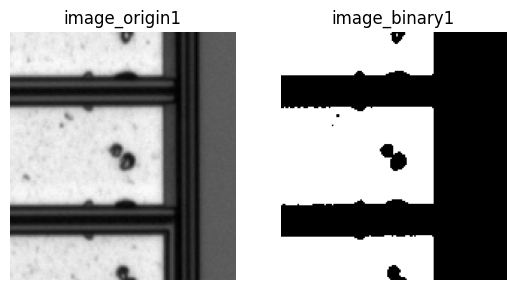

In [63]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(binary1,cmap='gray')
plt.title("image_origin1")
plt.axis("off")
# Do the image binary to seperate pad and background
# code begins
_,image_binary1 = cv2.threshold(binary1, 127, 255, cv2.THRESH_BINARY)   # (輸入影像, 門檻值, 如果像素大於門檻，就設為這個值, 標準二值化)
# 會回傳兩個值:實際使用的門檻值, 二值化後的影像

# save result
cv2.imwrite('output/binary_task1.bmp', image_binary1)
# plot
plt.subplot(1,2,2)
plt.imshow(image_binary1,cmap='gray')
plt.title("image_binary1")
plt.axis("off")

(np.float64(-0.5), np.float64(166.5), np.float64(156.5), np.float64(-0.5))

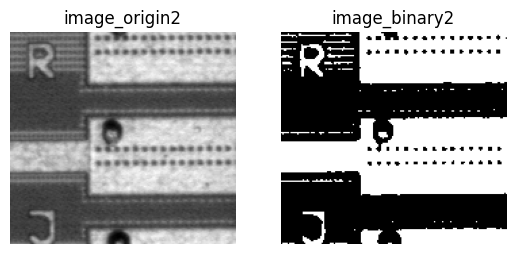

In [64]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(binary2,cmap='gray')
plt.title("image_origin2")
plt.axis("off")
# Do the image binary to seperate pad and background
_,image_binary2 = cv2.threshold(binary2, 127, 255, cv2.THRESH_BINARY)


# save result
cv2.imwrite('output/binary_task2.bmp', image_binary2)

plt.subplot(1,2,2)
plt.imshow(image_binary2,cmap='gray')
plt.title("image_binary2")
plt.axis("off")

(np.float64(-0.5), np.float64(162.5), np.float64(159.5), np.float64(-0.5))

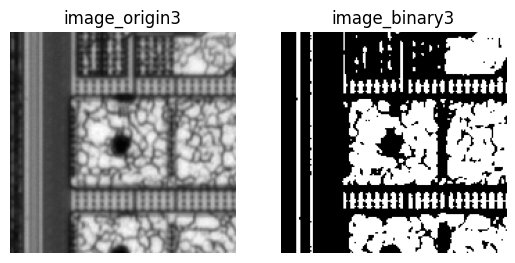

In [65]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(binary3,cmap='gray')
plt.title("image_origin3")
plt.axis("off")
# Do the image binary to seperate pad and background
_,image_binary3 = cv2.threshold(binary3, 127, 255, cv2.THRESH_BINARY)


# save result
cv2.imwrite('output/binary_task3.bmp', binary3)

plt.subplot(1,2,2)
plt.imshow(image_binary3,cmap='gray')
plt.title("image_binary3")
plt.axis("off")

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

False

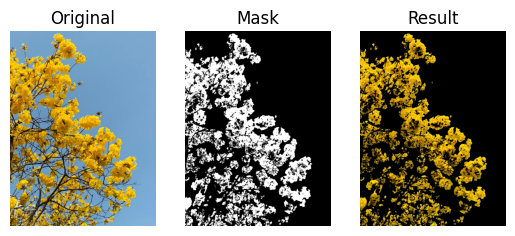

In [66]:
# 1. 讀取影像
img_bgr = cv2.imread('input/flower.jpg')

# 2. 轉為 HSV 空間
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# 3. 設定黃花 HSV 範圍並建立遮罩
mask = cv2.inRange(img_hsv, (20,100,100), (30,255,255))   # HSV 顏色範圍的下限和上限
# H (Hue，色相):0~180 (非360), S (Saturation，飽和度):0~255, V (Value，明度):0~255

# 4. 使用遮罩擷取黃色區域，其他區域為黑色
result_img = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)
# cv2.bitwise_and(A, B, mask=mask)做「位元 AND 運算」如果 mask 對應位置是 255 → 保留 image_bgr 的原始像素, 如果 mask 對應位置是 0 → 設為黑色 (0,0,0)

# 5. 顯示分割結果
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  #也可以 cv2.imshow("Original", img_bgr) 才是原圖
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")

# save result
cv2.imwrite('output/flower_yellow.jpg', img_hsv)

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

(np.float64(-0.5), np.float64(57.5), np.float64(45.5), np.float64(-0.5))

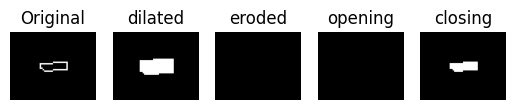

In [67]:
hsv_yellow = cv2.imread('input/cropHSV_yellow.jpg')
mask2=cv2.inRange(hsv_yellow, (110,100,50), (180,255,255))
plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))  
plt.title("Original")
plt.axis("off")

# Try to use erosion, dilation, open, close to fill up the lines.
# code begins
kernel = np.ones((5, 5), np.uint8)  # 5×5 的捲積核 (kernel)，裡面都是 1, 影像型別必須是 8-bit 無號整數

dilated_img = cv2.dilate(mask2, kernel, iterations=1)
plt.subplot(1,5,2)
plt.imshow(dilated_img, cmap='gray')  
plt.title("dilated")
plt.axis("off")

eroded_img = cv2.erode(mask2, kernel, iterations=1)  #iterations=1 → 做一次
plt.subplot(1,5,3)
plt.imshow(cv2.cvtColor(eroded_img, cv2.COLOR_BGR2RGB))  
plt.title("eroded")
plt.axis("off")

opening = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, kernel)
plt.subplot(1,5,4)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))  
plt.title("opening")
plt.axis("off")

closing = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel)
plt.subplot(1,5,5)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))  
plt.title("closing")
plt.axis("off")

# save result
#cv2.imwrite('output/morpho_yellow.jpg', result)


(np.float64(-0.5), np.float64(91.5), np.float64(92.5), np.float64(-0.5))

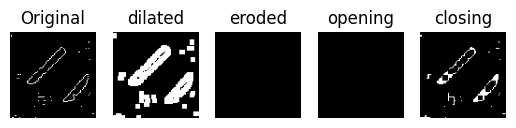

In [68]:
hsv_blue = cv2.imread('input/cropHSV_blue.jpg')
mask3=cv2.inRange(hsv_blue, (70,100,50), (180,255,255))
plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(mask3, cv2.COLOR_BGR2RGB))  
plt.title("Original")
plt.axis("off")
# Try to use erosion, dilation, open, close to fill up the lines.
# code begins
kernel = np.ones((5, 5), np.uint8)  # 5×5 的捲積核 (kernel)，裡面都是 1, 影像型別必須是 8-bit 無號整數

dilated_img2 = cv2.dilate(mask3, kernel, iterations=1)
plt.subplot(1,5,2)
plt.imshow(dilated_img2, cmap='gray')  
plt.title("dilated")
plt.axis("off")

eroded_img2 = cv2.erode(mask3, kernel, iterations=1)  #iterations=1 → 做一次
plt.subplot(1,5,3)
plt.imshow(cv2.cvtColor(eroded_img2, cv2.COLOR_BGR2RGB))  
plt.title("eroded")
plt.axis("off")

opening2 = cv2.morphologyEx(mask3, cv2.MORPH_OPEN, kernel)
plt.subplot(1,5,4)
plt.imshow(cv2.cvtColor(opening2, cv2.COLOR_BGR2RGB))  
plt.title("opening")
plt.axis("off")

closing2 = cv2.morphologyEx(mask3, cv2.MORPH_CLOSE, kernel)
plt.subplot(1,5,5)
plt.imshow(cv2.cvtColor(closing2, cv2.COLOR_BGR2RGB))  
plt.title("closing")
plt.axis("off")


# save result
#cv2.imwrite('output/morpho_blue.jpg', result)

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

Area of Pad: 124.5


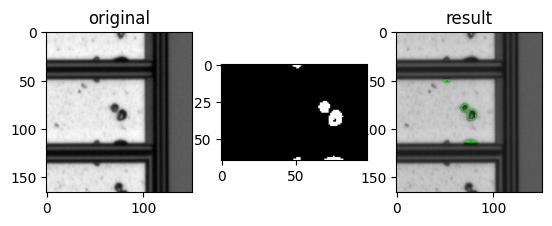

In [69]:
pad_task1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,3,1)
plt.imshow(pad_task1, cmap="gray")
plt.title("original")

#切區域
y1, y2 = 50, 115
x1, x2 = 1, 100   
roi = pad_task1[y1:y2, x1:x2]

# Find the pad and probemark contours and draw.
# code begins
_,binary = cv2.threshold(roi, 100, 255, cv2.THRESH_BINARY_INV)
plt.subplot(1,3,2)
plt.imshow(binary,cmap='gray')

# 找輪廓
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.findContours 會找到影像中的白色區域（物件）的輪廓
#contours → 存放所有輪廓的列表，每個輪廓是一個點的集合。
#cv2.RETR_EXTERNAL → 只取「最外層」輪廓。
#cv2.CHAIN_APPROX_SIMPLE → 壓縮水平、垂直、斜線點，只保留關鍵點，節省記憶體。

# 篩pad設面積大小
pads = [cnt for cnt in contours if 5 < cv2.contourArea(cnt) < 500]

# 在result上畫結果
result = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
pad_area = 0
for cnt in pads:
    area = cv2.contourArea(cnt)
    pad_area += area
    cv2.drawContours(result, [cnt], -1, (0, 255, 0), 1)  # 綠色輪廓
print("Area of Pad:", pad_area)

# 最終輸出
final = cv2.cvtColor(pad_task1, cv2.COLOR_GRAY2BGR)    # 把它轉成三通道彩色影像，這樣才能畫彩色的東西（不然 cv2.drawContours 的綠色會看不出來）
final[y1:y2, x1:x2] = result   # 這行的意思是：「把處理好的 ROI (result) 貼回到 final 的對應位置」
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.title("result")
plt.show()
# save and print result
#cv2.imwrite('output/pad_task1_cont.bmp', result)